## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:

## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE =[2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
for bachSize in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bachSize, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(bachSize)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 699s 14ms/step - loss: 2.2446 - acc: 0.1596 - val_loss: 3.1655 - val_acc: 0.1891
Epoch 49/50
50000/50000 [==============================] - 685s 14ms/step - loss: 2.2460 - acc: 0.1545 - val_loss: 3.0846 - val_acc: 0.1778
Epoch 50/50
50000/50000 [==============================] - 682s 14ms/step - loss: 2.2533 - acc: 0.1506 - val_loss: 3.2495 - val_acc: 0.1706
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328   

50000/50000 [==============================] - 97s 2ms/step - loss: 1.1239 - acc: 0.6017 - val_loss: 1.4058 - val_acc: 0.5124
Epoch 47/50
50000/50000 [==============================] - 96s 2ms/step - loss: 1.1219 - acc: 0.6023 - val_loss: 1.3595 - val_acc: 0.5225
Epoch 48/50
50000/50000 [==============================] - 97s 2ms/step - loss: 1.1124 - acc: 0.6060 - val_loss: 1.3979 - val_acc: 0.5135
Epoch 49/50
50000/50000 [==============================] - 96s 2ms/step - loss: 1.1185 - acc: 0.6030 - val_loss: 1.3400 - val_acc: 0.5328
Epoch 50/50
50000/50000 [==============================] - 96s 2ms/step - loss: 1.1106 - acc: 0.6055 - val_loss: 1.3266 - val_acc: 0.5406
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               157

50000/50000 [==============================] - 54s 1ms/step - loss: 0.8068 - acc: 0.7116 - val_loss: 1.6074 - val_acc: 0.4899
Epoch 46/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7929 - acc: 0.7173 - val_loss: 1.6153 - val_acc: 0.5039
Epoch 47/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7942 - acc: 0.7171 - val_loss: 1.6246 - val_acc: 0.5004
Epoch 48/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7814 - acc: 0.7191 - val_loss: 1.5812 - val_acc: 0.5062
Epoch 49/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7770 - acc: 0.7226 - val_loss: 1.5586 - val_acc: 0.5176
Epoch 50/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.7668 - acc: 0.7241 - val_loss: 1.6176 - val_acc: 0.5041
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)           

50000/50000 [==============================] - 27s 533us/step - loss: 0.3352 - acc: 0.8855 - val_loss: 2.5187 - val_acc: 0.4364
Epoch 44/50
50000/50000 [==============================] - 27s 534us/step - loss: 0.3259 - acc: 0.8887 - val_loss: 2.5559 - val_acc: 0.4525
Epoch 45/50
50000/50000 [==============================] - 26s 530us/step - loss: 0.3034 - acc: 0.8986 - val_loss: 2.2513 - val_acc: 0.4651
Epoch 46/50
50000/50000 [==============================] - 27s 533us/step - loss: 0.2948 - acc: 0.8980 - val_loss: 2.4304 - val_acc: 0.4658
Epoch 47/50
50000/50000 [==============================] - 27s 530us/step - loss: 0.2879 - acc: 0.9000 - val_loss: 2.9608 - val_acc: 0.4163
Epoch 48/50
50000/50000 [==============================] - 27s 532us/step - loss: 0.2735 - acc: 0.9090 - val_loss: 2.5682 - val_acc: 0.4443
Epoch 49/50
50000/50000 [==============================] - 27s 535us/step - loss: 0.2697 - acc: 0.9079 - val_loss: 2.6438 - val_acc: 0.4506
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 21s 423us/step - loss: 0.2698 - acc: 0.9212 - val_loss: 2.3517 - val_acc: 0.4446
Epoch 42/50
50000/50000 [==============================] - 21s 425us/step - loss: 0.2614 - acc: 0.9227 - val_loss: 2.2643 - val_acc: 0.4644
Epoch 43/50
50000/50000 [==============================] - 21s 429us/step - loss: 0.2535 - acc: 0.9247 - val_loss: 2.2146 - val_acc: 0.4710
Epoch 44/50
50000/50000 [==============================] - 21s 423us/step - loss: 0.2343 - acc: 0.9322 - val_loss: 2.2894 - val_acc: 0.4707
Epoch 45/50
50000/50000 [==============================] - 21s 423us/step - loss: 0.2263 - acc: 0.9339 - val_loss: 2.3479 - val_acc: 0.4582
Epoch 46/50
50000/50000 [==============================] - 21s 429us/step - loss: 0.2053 - acc: 0.9427 - val_loss: 2.3252 - val_acc: 0.4713
Epoch 47/50
50000/50000 [==============================] - 21s 422us/step - loss: 0.2022 - acc: 0.9432 - val_loss: 2.4059 - val_acc: 0.4655
Epoch 48/50
50000/50000 [=======

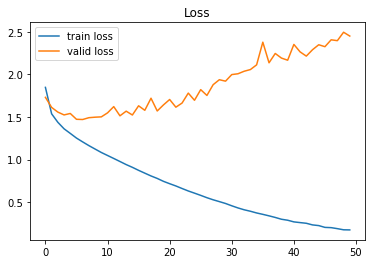

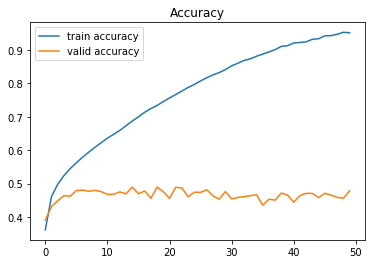

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()